# Task

This is the continuation of last weeks exercise.
After having analysed the Titanic Dataset, you should now prepare a machine
learning model to predict whether passengers will survive.

It is entirely up to you which algorithm and feature engineering to use.
I do recommend using some of the algorithms available in sklearn, but if you would 
like to use another library that's also ok. It's a good idea to try and evaluate different algorithms,
and different pre-processing/cleaning/feature-generation options if you have the time.

I have split the training data into a train- and a test-set already. These can be found as separate files 
in the `data`-directory. You should only use the training set throughout your entire development -- feel free 
to use cross-validation or split the training set into a train- and a validation set again.
Once you have developed a final model, you should evaluate this model on the test set I've provided,
and report the MCC score for the test set in the title of your PR. You should **not** evaluate the test
set more than once for this initial submission!

If you decide to change your code after code-review, you can report new values in the comments, but
leave the initial MCC in the title unchanged.

## Imports

In [589]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn import tree
from pathlib import Path

## Training the Dataset

In [590]:
filepath = Path.cwd().parents[1] / 'data' / 'titanic_train.csv'
titanic_statistics = pd.read_csv(filepath)
titanic_statistics

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
1,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
2,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
3,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
4,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
...,...,...,...,...,...,...,...,...,...,...,...,...
752,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
753,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
754,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
755,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S


In [591]:
titanic_statistics['Age'].fillna (100, inplace= True)
titanic_statistics.loc[titanic_statistics['Sex'] == 'female', 'Sex'] = 1
titanic_statistics.loc[titanic_statistics['Sex'] == 'male', 'Sex'] = 0

In [592]:
x =  titanic_statistics[['Pclass', 'Sex', 'Age']]
y = titanic_statistics[['Survived']]

In [593]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [594]:
x_train.head()

,Pclass,Sex,Age
752,1,0,100.0
541,3,1,100.0
253,3,0,26.0
180,3,0,100.0
216,1,1,32.0


In [595]:
x_train.shape

(605, 3)

In [596]:
x_test.head()

,Pclass,Sex,Age
53,2,1,55.0
166,3,0,9.0
306,2,1,32.5
618,3,0,25.0
401,3,0,36.0


In [597]:
classifier = tree.DecisionTreeClassifier()

In [598]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [599]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

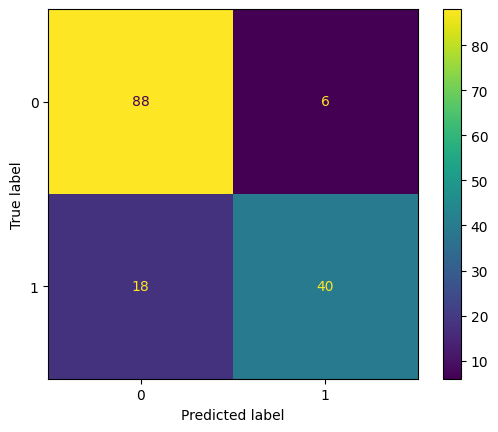

In [600]:
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [601]:
accuracy_score(y_test, y_pred)

0.8421052631578947

In [602]:
f1_score(y_test, y_pred, average='macro')

0.8246153846153846

In [603]:
matthews_corrcoef(y_test, y_pred)

0.6617580765609314

In [604]:
matthews_corrcoef(y_train, classifier.predict(x_train))

0.7505266571907292

In [605]:
testpath = Path.cwd().parents[1] / 'data' / 'titanic_test.csv'
titanic_test = pd.read_csv(testpath)

titanic_test['Age'].fillna (100, inplace= True)
titanic_test.loc[titanic_test['Sex'] == 'female', 'Sex'] = 1
titanic_test.loc[titanic_test['Sex'] == 'male', 'Sex'] = 0

x_train_test=  titanic_test[['Pclass', 'Sex', 'Age']]
y_train_test = titanic_test[['Survived']]

y_pred_test = classifier.predict(x_train_test)
matthews_corrcoef(y_train_test, y_pred_test)

0.563479668195565